## 实验报告：爬取公司年报信息并结构化处理

### 第一部分：数据提取

In [3]:
#将所需要的模块导入
import os
os.chdir('C:\\Users\\32809\\Desktop\\金融数据获取与处理\\年报')
import pdfplumber
import pandas as pd
import re

In [4]:
#定义一个函数来获取每份年报的所需信息
def pdf_info(pdf_name):
    TEXT = ""
    with pdfplumber.open(pdf_name) as pdf:
        for n in range(0,20): 
            page = pdf.pages[n]
            text = page.extract_text()
            if text != None:
                TEXT += text
            else:
                pass
    TEXT_clear = TEXT.replace("\n","")
    TEXT_2 = re.findall("公司简介和主要财务指标(.*?)公司业务概要",TEXT_clear,re.S)[1]
    #提取基本信息 bsc_inf0 = []（股票简称、股票代码、公司的法定代表人、办公地址、公司网址、电子信箱）
    index_name = ["股票简称","股票代码","公司的法定代表人","办公地址","公司国际互联网网址","电子信箱"]
    index_name_cut = ["股票代码","公司的中文名称","注册地址","办公地址的邮政编码","电子信箱","二、联系人和联系方式"]
    bsc_info = []
    pattern = ""
    t = 0
    while t < len(index_name):
        pattern = str(index_name[t]) + "(.*?)" + str(index_name_cut[t])
        info = re.findall(pattern,TEXT_2,re.S)[0].strip()
        bsc_info.append(info)
        t += 1
    #提取主要会计数据和财务指标 data_clean  
    data_text = re.findall("五、主要会计数据和财务指标(.*?)六、分季度主要财务指标",TEXT_2,re.S)[0]
    data = re.findall("归属于上市公司[\u4E00-\u9FA5]*股东的扣除(.*?)经营活动产生的现金流量",data_text,re.S)[0]
    data1 = re.sub(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*%","",data)  #除去2018年比2017年的增长率
    data_clean = re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",data1)   
    #将基本信息与会计数据合并    
    info_data = bsc_info + data_clean  
    return(info_data)

In [5]:
#将11份pdf名称写进一个列表
path = "C:\\Users\\32809\\Desktop\\金融数据获取与处理\\年报"
total_pdf = os.listdir(path)
item = []

In [6]:
total_pdf

['300161：2019年年度报告.pdf',
 '300169：2019年年度报告.pdf',
 '300174：2019年年度报告.pdf',
 '300214：2019年年度报告.pdf',
 '300235：2019年年度报告.pdf',
 '300291：2019年年度报告.pdf',
 '300316：2019年年度报告.pdf',
 '300363：2019年年度报告.pdf',
 '300370：2019年年度报告.pdf',
 '300428：2019年年度报告.pdf',
 '300442：2019年年度报告.pdf']

In [7]:
#对11份pdf循环读入数据
for i in range(len(total_pdf)):
    item.append(pdf_info(total_pdf[i]))
column_name =  ["股票简称","股票代码","法定代表人","办公地址","公司网址","电子信箱","2019年","2018年","2017年"]  
df = pd.DataFrame(data=item,columns =column_name)

In [8]:
df

股票简称    股票代码 法定代表人                                      办公地址  \
0   华中数控  300161   陈吉红                             武汉市东湖开发区华工科技园   
1   天晟新材  300169   吴海宙                             常州市龙锦路 号  508   
2   元力股份  300174   许文显                           福建省南平市陈坑至瓦口工业园区   
3   日科化学  300214   彭国锋                            山东省昌乐县英轩街3999号   
4   方直科技  300235   黄元忠                     深圳市南山区大新路198号创新大厦B座9楼   
5   华录百纳  300291    方刚                         北京市朝阳区安家楼50号院A7-2   
6   晶盛机电  300316   曹建伟                      浙江省杭州市余杭区五常街道创智一号2号楼   
7   博腾股份  300363   居年丰  重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
8   安控科技  300370   许永良                           北京市海淀区地锦路9号院6号楼   
9   四通新材  300428   臧立国                            保定市清苑区发展西街359号   
10   普丽盛  300442   姜卫东                          上海市金山区张堰镇金张支路84号   

                       公司网址                         电子信箱            2019年  \
0       www.huazhongcnc.com               hcnc@hzncc.com  -152,097,406.43   
1    http://www.tschina.com           dongmi@tschina.com  -288,352,555.02   
2      www.yuanlicarbon.com          dm@yuanlicarbon.com    54,133,231.70   
3   http://www.rikechem.com        rikechem@rikechem.com   181,209,287.81   
4        www.kingsunedu.com  kingsunsoft@kingsunsoft.com    19,579,416.11   
5       http://www.hlbn.cc/               hbndsh@hlbn.cc    43,157,378.84   
6       http://www.jsjd.cc/                 jsjd@jsjd.cc   609,508,058.74   
7      http://www.porton.cn          porton.db@porton.cn   162,088,354.80   
8             www.etrol.com               info@etrol.com   -26,187,111.22   
9    http://www.stnm.com.cn             info@stnm.com.cn   382,166,254.21   
10           www.cn-pls.com               pls@cn-pls.com   -21,767,601.85   

                2018年           2017年  
0     -132,710,265.82  -32,479,462.21  
1        3,983,219.38  -41,535,445.34  
2       73,574,722.40   42,857,303.27  
3       48,745,322.25  107,769,940.45  
4       -2,716,595.98    4,727,257.23  
5   -1,846,812,139.29  100,388,073.26  
6      536,807,591.72  353,278,562.64  
7       72,047,777.52   90,031,610.18  
8     -592,180,815.47   97,977,972.47  
9       51,721,827.09   72,426,483.42  
10    -239,793,986.19   -3,764,471.86

### 第二部分：画图展示

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #确保显示中文
plt.rcParams['axes.unicode_minus'] = False  #确保显示负数的参数设置

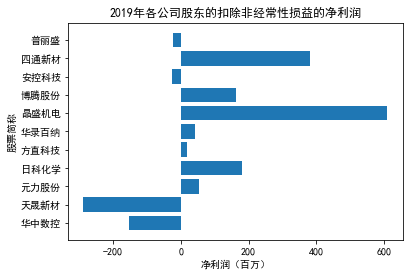

In [23]:
x = list(df.loc[:,'股票简称'])
y = list(df.loc[:, '2019年'].apply(lambda x: float(x.replace(",", ""))/1000000))
plt.barh(range(len(x)), y,tick_label = x)
plt.xlabel('净利润（百万）')
plt.ylabel('股票简称')
plt.title('2019年各公司股东的扣除非经常性损益的净利润')
plt.show()

### 分析：

从2019年各公司股东的扣除非经常性损益的净利润条形柱状图中我们可以看到，天晟新材和华中数控公司在2019年中的净利润是负的，并且四通新材和晶盛机电公司在2019年的净利润与其他公司相比明显更高。